# 서울 범죄예방 수사용CCTV 설치 수 별 5대 범죄 발생현황 통계
- 2023년도 기준으로 작성
- https://data.seoul.go.kr

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm

#리눅스용 폰트 경로 설정
plt.rc('font',family="NanumBarunGothic")

In [2]:
import pandas as pd
file_path = "./ref/5대범죄발생현황20250307.csv"
file_path2 = "./ref/서울시자치구CCTV설치현황241231.xlsx"

crime = pd.read_csv(file_path)
CCTV = pd.read_excel(file_path2,skiprows=2)
CCTV = CCTV.iloc[:,2:]
crime['발생'] = crime['발생'].replace("-",0)
CCTV.head(3)

,구분,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년
0,계,26321.0,33013.0,40512.0,49222.0,58139.0,67281.0,74408.0,80005.0,86810.0,99758.0
1,종로구,935.0,1066.0,1225.0,1322.0,1327.0,1510.0,1573.0,1812.0,1872.0,2154.0
2,중구,363.0,565.0,838.0,1174.0,1242.0,1482.0,1911.0,2026.0,2157.0,2567.0


In [3]:
crime['발생'] = crime['발생'].astype(int)
crime.head(3)

,범죄별(1),범죄별(2),자치구별(1),자치구별(2),시점,발생,검거
0,합계,소계,합계,소계,2023,86213,64823
1,합계,소계,합계,종로구,2023,2981,3485
2,합계,소계,합계,중구,2023,3348,2465


In [4]:
# 범죄 종류별 분류
crime0 = crime.groupby('범죄별(2)')['발생'].sum().reset_index()
crime0.columns = ['type','count']
crime0.drop(index=3, axis=1,inplace = True)    # 소계 제거

In [5]:
# 지역별로 발생수 통합
crime = crime.groupby('자치구별(2)')['발생'].sum().reset_index()
crime.columns = ['local','count']  # 컬럼변경

crime1 = crime.set_index('local') # 인덱스 지역으로 바꿈
crime1.drop('소계',axis=0, inplace =True)   # 소계 제거
crime.head(2)

,local,count
0,강남구,13526
1,강동구,6796


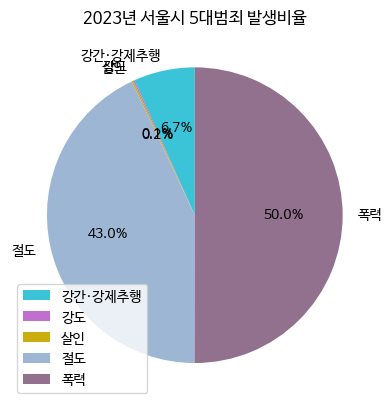

In [6]:
import numpy as np
color = [ np.random.rand(3,) for _ in range(len(crime0['type']))]
plt.pie(crime0['count'], labels = crime0['type'],colors=color,autopct = '%.1f%%', startangle=90)

plt.title('2023년 서울시 5대범죄 발생비율')
plt.legend()
plt.show()

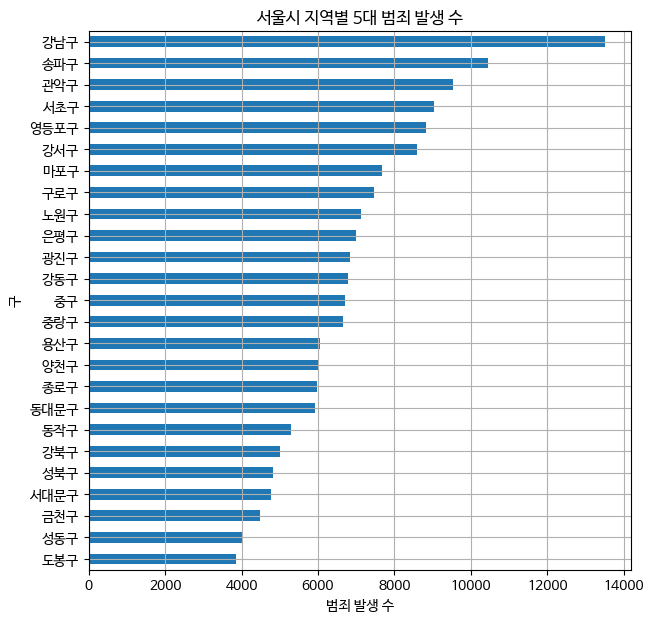

In [7]:
crime1['count'].sort_values().plot(y=crime1.index,kind='barh', grid= True, figsize=(7,7), ylabel='구')


plt.title('서울시 지역별 5대 범죄 발생 수')
plt.xlabel('범죄 발생 수')

plt.show()

In [8]:
CCTV = CCTV[['구분','2023년']]
cctv = CCTV.iloc[1:26,:]
cctv.columns =['local','cctv']
cctv['cctv'] = cctv['cctv'].astype(int)
cctv.head(3)

/tmp/ipykernel_41242/1326776095.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cctv['cctv'] = cctv['cctv'].astype(int)


,local,cctv
1,종로구,1872
2,중구,2157
3,용산구,2897


In [9]:
total = pd.merge(cctv,crime, on='local')
# total['population'] = total['population'].str.replace(",","").astype(int)
total = total.sort_values(by='count',ascending=False)
total.head(5)

,local,cctv,count
22,강남구,6829,13526
23,송파구,3471,10446
20,관악구,4210,9538
21,서초구,3343,9044
18,영등포구,3987,8836


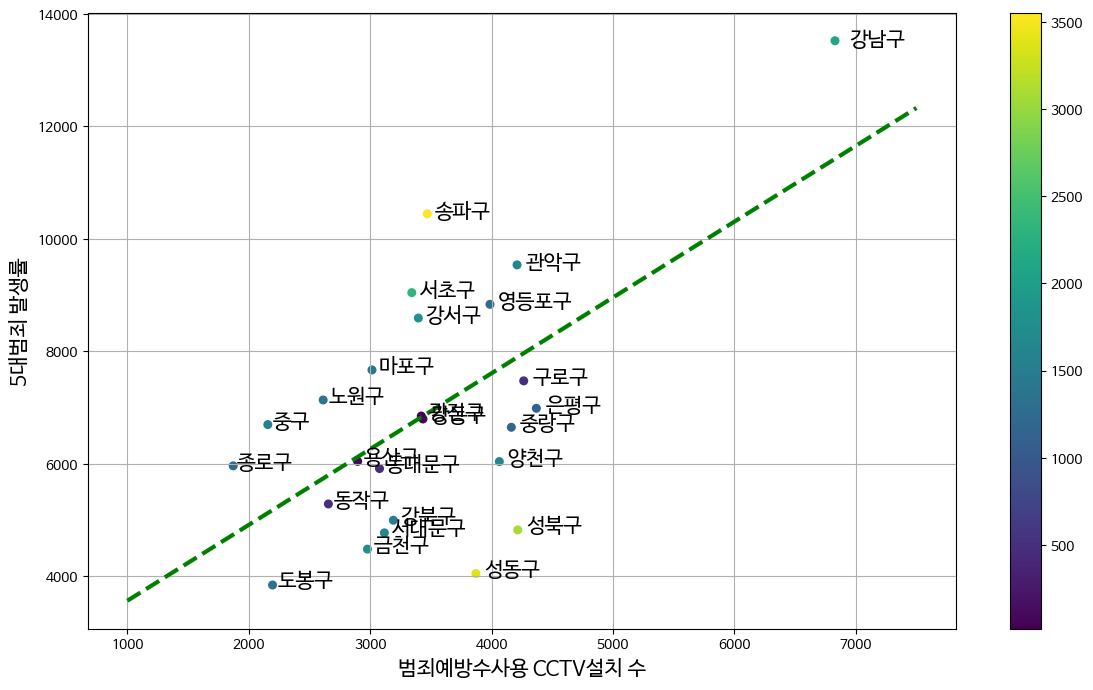

In [10]:
import numpy as np
fp1 = np.polyfit(total['cctv'],total['count'],1)
f1 = np.poly1d(fp1)
fx = np.linspace(1000,7500,10)

# 오차
total['err'] = np.abs(total['count'] - f1(total['cctv']))

plt.figure(figsize=(14,8))
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='g') #점선 생성

plt.scatter(total['cctv'], total['count'],s=30, c=total['err'])  #산점도 


for i in range(len(total['local'])):
    plt.text(total.iloc[i,1]*1.017,total.iloc[i,2]*0.994,total.iloc[i,0], size=15)

plt.xlabel('범죄예방수사용 CCTV설치 수', size=15)
plt.ylabel('5대범죄 발생률', size=15)

plt.grid() #격자무늬
plt.colorbar()

plt.show()

다음은 2023년 서울시 지역별 범죄예방수사용 CCTV설치수 대비 5대범죄(살인,강도,강간·강제추행,절도,폭력) 발생률 비교 분석 결과이다. <br>
강남구가 CCTV설치수, 범죄 발생률 모두 가장 높은 수치를 기록하였으며, CCTV설치수에 비해 범죄 발생률이 비교적 높은 송파구의 경우 추가적인 범죄발생 주의가 필요할 것으로 보인다. 특히 폭력과 절도 범죄가 많은것으로 분석되어 발생하는 구역에 CCTV설치를 통한 범죄예방을 강화해야 할 것으로 보인다.

In [11]:
# 공사중
# fig, axs = plt.subplots(2,1,figsize=(10,8))

# # crime1['count'].sort_values().plot(y=crime1.index,kind='barh', grid= True, figsize=(7,7), ylabel='구')

# axs[0].barh(crime1['count'],crime1.index)

# axs[0].title('서울시 지역별 5대 범죄 발생 수')
# axs[0].xlabel('범죄 발생 수')



# color = [ np.random.rand(3,) for _ in range(len(crime0['type']))]
# axs[1].pie(crime0['count'], labels = crime0['type'],colors=color,autopct = '%.1f%%', startangle=90)

# axs[1].title('2023년 서울시 5대범죄 발생비율')
# plt.legend()
# plt.show()

# plt.show()




# # import matplotlib.pyplot as plt
# # fig, axs = plt.subplots(2,2,figsize=(10,8)) # 2  x 2 서브플롯 생성

# # axs[0,0].plot([1,2,3],[4,5,6])

# # axs[0,1].scatter([1,2,3],[5,7,6])

# # axs[1,0].bar(['A','B','C'],[4,7,5])

# # axs[1,1].hist([1,1,1,3,3,3,2,2,4,5],bins=10)
# # plt.tight_layout()
# # plt.show()

In [17]:
file_path3 = "./ref/경찰청범죄발생지역별통계20231231.csv"
ori = pd.read_csv(file_path3, encoding="EUC-KR")
ori.loc[4]
for i in ori.columns[2:]:
    ori['total'] += ori.loc[:,i]

KeyError: 'total'

In [ ]:
ori.head(3)

In [15]:
ori['total'] = ori.iloc[:,2] + ori.iloc[:,3]
ori['total']

0        2
1        4
2       11
3       55
4       14
5      386
6        0
7       17
8     2696
9      254
10    1906
11      14
12     247
13       6
14      72
15      61
16     618
17      46
18      49
19       6
20      68
21     125
22       2
23    4126
24    1609
25      62
26     231
27      40
28    1250
29     173
30     227
31       1
32    1309
33       7
34      15
35       5
36      40
37    3262
Name: total, dtype: int64

In [ ]:
ori.columns[2:]